# Сборный проект № 1

## 1. Подготовка данных

### Изучение информации о датасетах

Посмотрим на имеющиеся датасеты.

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Уже видны пропуски в данных, касающие оценок игр критиками, пользователями и рейтинга ESRB.

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски есть и в других столбцах.  
Заменим названия столбцов, заменив все буквы на строчные.

In [3]:
games.set_axis(['name','platform','year_of_release','genre','na_players','eu_players','ru_players','other_players','critic_score','user_score','rating'],axis = 'columns',inplace = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
name               16717 non-null object
platform           16719 non-null object
year_of_release    16450 non-null float64
genre              16717 non-null object
na_players         16719 non-null float64
eu_players         16719 non-null float64
ru_players         16719 non-null float64
other_players      16719 non-null float64
critic_score       8137 non-null float64
user_score         10015 non-null object
rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на второй датасет.

In [4]:
rating = pd.read_csv('/datasets/rating.csv')
rating.head(15)

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


Второй датасет - это словарь, который поясняет значения столбца rating_type (рейтинг ESRB).

### Подготовка данных

Прежде всего, в датасет games добавим столбец с совокупным объемом продаж.

In [5]:
games['global_players']=games['na_players']+games['eu_players']+games['ru_players']+games['other_players']
games.head(15)

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Займемся пропущенными значениями.

In [6]:
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14246,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Заменим пропущенные значения в столбцах name и genre на No data (видим, что это одни и те же кейсы).

In [7]:
games['name'] = games['name'].fillna('No data')
games['genre'] = games['genre'].fillna('No data')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
name               16719 non-null object
platform           16719 non-null object
year_of_release    16450 non-null float64
genre              16719 non-null object
na_players         16719 non-null float64
eu_players         16719 non-null float64
ru_players         16719 non-null float64
other_players      16719 non-null float64
critic_score       8137 non-null float64
user_score         10015 non-null object
rating             9950 non-null object
global_players     16719 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


Проверим, есть ли дублирующие значения в названиях игр.

In [8]:
games['name'].value_counts()

Need for Speed: Most Wanted                                       12
LEGO Marvel Super Heroes                                           9
Madden NFL 07                                                      9
FIFA 14                                                            9
Ratatouille                                                        9
FIFA Soccer 13                                                     8
Cars                                                               8
LEGO The Hobbit                                                    8
LEGO Jurassic World                                                8
Terraria                                                           8
Monopoly                                                           8
FIFA 15                                                            8
The LEGO Movie Videogame                                           8
LEGO Harry Potter: Years 5-7                                       8
LEGO Star Wars II: The Original Tr

Вообще, дубликатов много... Возможно, это релизы разных лет?

In [9]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5973,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6274,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6411,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


Абсолютных дубликатов здесь нет: игра под одним названием могла выходить в разные годы и для разных платформ.

Проверим, нет ли дубликатов в столбце platform.

In [10]:
games['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2152
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      393
PSP     1209
PSV      432
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

Все выглядит нормально.

Проверим пропущенные значения для столбца year_of_release.

In [11]:
games.query('year_of_release.isnull()').head(20)

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


Каких-то тенденций в кейсах с пропущенным значением года выпуска не наблюдается.  
Заменим на код 9999, который позволит отдельно выделять группу игр с пропущенным годом выпуска, а также привести столбец к типу int.

In [12]:
games['year_of_release']=games['year_of_release'].fillna(9999)
games['year_of_release']=games['year_of_release'].astype(int)
games.query('year_of_release == 9999').head(15)

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players
183,Madden NFL 2004,PS2,9999,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,9999,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,9999,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,9999,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,9999,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,9999,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,9999,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,9999,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,9999,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,9999,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


Посмотрим на диапазон значений в столбце year_of_release.

In [13]:
games['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2017       3
2020       1
9999     269
Name: year_of_release, dtype: int64

Необъяснимых значений не наблюдается. Есть 2020 год, вероятно, это запланированный релиз.

Проверим наличие дубликатов в столбце genre.

In [14]:
games['genre'].value_counts().sort_index()

Action          3370
Adventure       1303
Fighting         849
Misc            1750
No data            2
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1500
Shooter         1323
Simulation       874
Sports          2348
Strategy         683
Name: genre, dtype: int64

Замена пропущенных значений в столбцах critic_score, user_score и rating.  
Пропущенных значений достаточно много, вероятно, не для всех игр (особенно вышедших достаточно давно) доступна необходимая информация.  
На самом деле, замена на среднее или медиану (даже по какому-нибудь дополнительному критерию - например, сгруппировав по жанру или платформе) является очень рискованной затеей, так как не дает возможность адекватно предсказать реальные значения. С учетом большого количества пропусков такая замена может сильно исказить результаты.  
Оставим пропуски без замены, но преобразуем столбец user_score к формату float, а также проверим на дубликаты.

In [15]:
games['critic_score'].value_counts().sort_index()

13.0      1
17.0      1
19.0      6
20.0      3
21.0      1
22.0      1
23.0      4
24.0      4
25.0      7
26.0     12
27.0      8
28.0     11
29.0      3
30.0     12
31.0      9
32.0     15
33.0     22
34.0     10
35.0     27
36.0     26
37.0     28
38.0     34
39.0     39
40.0     26
41.0     29
42.0     37
43.0     54
44.0     50
45.0     47
46.0     56
       ... 
69.0    215
70.0    256
71.0    254
72.0    226
73.0    238
74.0    226
75.0    245
76.0    235
77.0    225
78.0    240
79.0    218
80.0    237
81.0    218
82.0    208
83.0    206
84.0    183
85.0    151
86.0    137
87.0    118
88.0    116
89.0    105
90.0     76
91.0     70
92.0     54
93.0     47
94.0     37
95.0     16
96.0     18
97.0     11
98.0      4
Name: critic_score, Length: 82, dtype: int64

Диапазон значений кажется адекватным.

Заменим пропущенные значения на 999 и будем интерпретировать их как "без отзыва".

In [16]:
games['critic_score']=games['critic_score'].fillna(999)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
name               16719 non-null object
platform           16719 non-null object
year_of_release    16719 non-null int64
genre              16719 non-null object
na_players         16719 non-null float64
eu_players         16719 non-null float64
ru_players         16719 non-null float64
other_players      16719 non-null float64
critic_score       16719 non-null float64
user_score         10015 non-null object
rating             9950 non-null object
global_players     16719 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [17]:
games['user_score'].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
       ... 
2.5      12
9.4      11
2.4      11
2        11
1.7       9
2.9       9
2.1       9
2.7       8
2.2       6
1.8       6
9.5       6
1.4       5
2.6       4
1.2       3
1.6       3
1.1       2
0.2       2
9.6       2
2.3       2
1.3       2
0.7       2
0.3       2
1         2
0.9       2
0.6       2
1.5       2
0.5       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Перекодируем пропущенные в 99, также поступим с вариантом tbd.

In [18]:
games['user_score'] = games['user_score'].fillna(99)
games['user_score'] = games['user_score'].replace('tbd', 99)
games['user_score'] = pd.to_numeric(games['user_score'])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
name               16719 non-null object
platform           16719 non-null object
year_of_release    16719 non-null int64
genre              16719 non-null object
na_players         16719 non-null float64
eu_players         16719 non-null float64
ru_players         16719 non-null float64
other_players      16719 non-null float64
critic_score       16719 non-null float64
user_score         16719 non-null float64
rating             9950 non-null object
global_players     16719 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
games['user_score'].value_counts().sort_index()

0.0        1
0.2        2
0.3        2
0.5        2
0.6        2
0.7        2
0.9        2
1.0        2
1.1        2
1.2        3
1.3        2
1.4        5
1.5        2
1.6        3
1.7        9
1.8        6
1.9        2
2.0       11
2.1        9
2.2        6
2.3        2
2.4       11
2.5       12
2.6        4
2.7        8
2.8       24
2.9        9
3.0       21
3.1       23
3.2       13
        ... 
6.9      143
7.0      220
7.1      180
7.2      167
7.3      236
7.4      215
7.5      251
7.6      220
7.7      240
7.8      324
7.9      249
8.0      290
8.1      244
8.2      282
8.3      254
8.4      223
8.5      253
8.6      211
8.7      188
8.8      186
8.9      153
9.0      120
9.1       90
9.2       43
9.3       31
9.4       11
9.5        6
9.6        2
9.7        1
99.0    9129
Name: user_score, Length: 96, dtype: int64

Проверим дубликаты в столбце rating.

In [20]:
games['rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Все корректно.  
Заменим пропущенные значения на NR (no reviews).

In [21]:
games['rating'] = games['rating'].fillna('NR')
games['rating'].value_counts()

NR      6769
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
name               16719 non-null object
platform           16719 non-null object
year_of_release    16719 non-null int64
genre              16719 non-null object
na_players         16719 non-null float64
eu_players         16719 non-null float64
ru_players         16719 non-null float64
other_players      16719 non-null float64
critic_score       16719 non-null float64
user_score         16719 non-null float64
rating             16719 non-null object
global_players     16719 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Итак, у нас нет больше пропущенных значений, а все столбцы приведены к нужному типу.

## 2. Исследовательский анализ данных

### Анализ по годам релиза

Построим распределение выпуска игр по годам релиза.

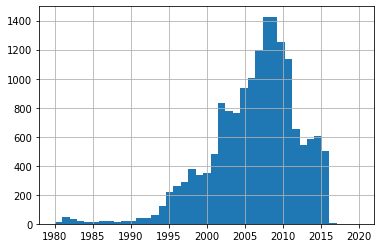

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
games['year_of_release'].hist(bins=41, range=(1980, 2020))

Из графика видно, что до начала 90х годов прошлого века релизы были единичными, после чего начинается постепенный рост, достигший пика во второй половине "нулевых".  
Количество релизов резко снижается, начиная с 2012 года.

Посмотрим на распределение релизов с отзывами и без.  
Сначала создадим столбец, в котором закодируем наличие отзыва: если есть рейтинг от критиков или пользователей, кодируем как "Есть отзыв", если нет ни от тех, ни от других, - "Нет отзыва".

In [24]:
def reviews(row):
    critic_score = row['critic_score']
    user_score = row['user_score']
    if (critic_score == 999 and user_score == 99):
        return 'Нет отзыва'
    else:
        return 'Есть отзыв'

games['reviews'] = games.apply(reviews, axis=1)
games.head(10)

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players,reviews
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Есть отзыв
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999.0,99.0,NR,40.24,Нет отзыва
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Есть отзыв
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Есть отзыв
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999.0,99.0,NR,31.38,Нет отзыва
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,999.0,99.0,NR,30.26,Нет отзыва
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Есть отзыв
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Есть отзыв
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Есть отзыв
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,999.0,99.0,NR,28.31,Нет отзыва


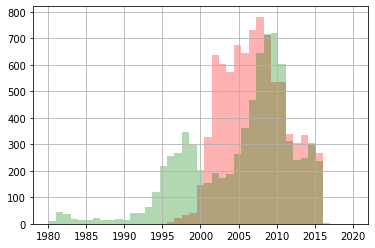

In [25]:
games.query('reviews == "Есть отзыв"')['year_of_release'].hist(bins=41, range=(1980, 2020), color = 'red', alpha = 0.3)
games.query('reviews == "Нет отзыва"')['year_of_release'].hist(bins=41, range=(1980, 2020), color = 'green', alpha = 0.3)

До начала "нулевых" подавляющая часть релизов не имеют рейтингов, что объяснимо: в то время единой системы оценки, видимо, не существовало.  
В "нулевые" большинство релизов имеют рейтинги, однако с 2005 года количество игр без отзывов снова возрастает и постепенно сравнивается с количеством игр "с отзывом".

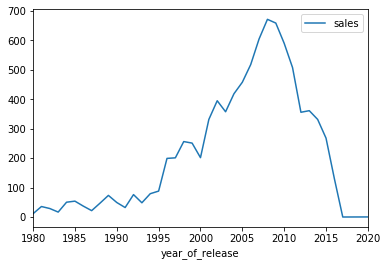

In [26]:
sales_by_years = games.pivot_table(index='year_of_release', values='global_players', aggfunc=['sum']).reset_index()
sales_by_years.set_axis(['year_of_release','sales'],axis = 'columns',inplace = True)
sales_by_years.query('year_of_release != 9999').plot(x='year_of_release', y='sales')

Видно, что совокупные продажи всех игр до 1995 года составляют менее 100 млн долларов в год, затем к 2000 вырастают до приблизительно 300 млн.  
Резкий подъем происходит в "нулевые", к концу которых совокупные ежегодные продажи достигают почти 700 млн долларов.  
После чего происходит спад, что, возможно, связано отчасти и с неполнотой анализируемых данных за последние годы.

### Анализ глобальных продаж

Построим ящик с усами по данным с глобальными продажами.  
Для начала взглянем на общие значения переменной.

In [27]:
games['global_players'].describe()

count    16719.000000
mean         0.533289
std          1.548092
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_players, dtype: float64

Очевидно, что подавляющая часть значений в диапазоне менее 5 млн долларов, а медианное значение и вовсе 170 тыс. долларов.  
Построим сначала ящик с усами с ограничением до 10 млн.

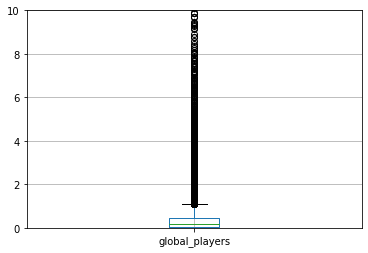

In [28]:
plt.ylim(0, 10)
games.boxplot('global_players')

Видно, что основная часть игр приносит не более 1 млн долларов, при этом есть достаточно много значительно более прибыльных релизов.  
Попробуем ограничить 5 млн.

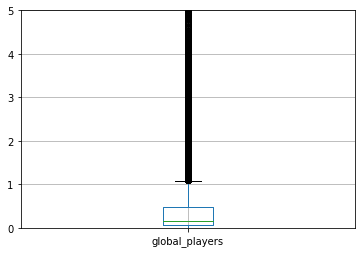

In [29]:
plt.ylim(0, 5)
games.boxplot('global_players')

Здесь отчетливо видно, что медиана сдвинута в первому квартилю.

### Платформа с наибольшим количеством игр

Посчитаем количество игр для каждой платформы с помощью метода value_counts().

In [30]:
games['platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Наиболее популярная платформа - PS2

### Жанр с наибольшим количеством игр

Используем метод value_counts, считая одной игрой - один релиз на одной платформе. 

In [31]:
games['genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
No data            2
Name: genre, dtype: int64

Наиболее популярный жанр - Action.

### Игры с наибольшей и наименьшей оценкой от критиков и пользователей

Для начала выведем максимальные и минимальные значения по соответствующим столбцам, а затем получим срезы по нужным значениям.

In [32]:
print(games['critic_score'].min(), games.query('critic_score != 999')['critic_score'].max())

13.0 98.0


In [33]:
games.query('critic_score == 13')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players,reviews
13690,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04,Есть отзыв


In [34]:
games.query('critic_score == 98')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players,reviews
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00,Есть отзыв
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50,Есть отзыв
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68,Есть отзыв
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34,Есть отзыв


Самую низкую оценку от критиков получила игра Ride to Hell, выпущенная на платформе PS3 в 2013 году.  
Самые высокие оценки получили игры Grand Theft Auto IV (для платформ X360 и PS3), Tony Hawk's Pro Skater 2 (PS, 2000) и SoulCalibur (DC, 1999)

In [35]:
print(games['user_score'].min(), games.query('user_score != 99')['user_score'].max())

0.0 9.7


In [36]:
games.query('user_score == 0')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players,reviews
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,999.0,0.0,E,0.72,Есть отзыв


In [37]:
games.query('user_score == 9.7')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,global_players,reviews
14414,Breath of Fire III,PSP,2005,Role-Playing,0.0,0.02,0.0,0.01,999.0,9.7,T,0.03,Есть отзыв


Самую низкую оценку от пользователей получила игра My Little Pony: Pinkie Pie's Party (ноль баллов!).  
Выше всего пользователи оценили игру Breath of Fire III, вышедшую в 2005 году для PSP.

### Корреляция оценок критиков и пользователей

Посчитаем корреляцию с помощью метода corr.

In [38]:
print("Корреляция оценок пользователей и критиков: {:.2f}".format(games.query('user_score != 99')['user_score'].corr(games.query('critic_score != 999')['critic_score'])))

Корреляция оценок пользователей и критиков: 0.58


Оценки критиков и пользователей достаточно тесно взаимосвязаны, но все же иногда эти две группы оценивают игры по-разному.

## 3. Портрет пользователей для каждого региона

### TOP-5 предпочтительных жанров

Создадим сводную таблицу, в которой строками будут жанры, а столбцами - суммы продаж по регионам.

In [39]:
genres = games.pivot_table(index='genre', values=['na_players', 'eu_players', 'ru_players'], aggfunc=['sum']).reset_index()
genres.set_axis(['genre','na_players_sales', 'eu_players_sales', 'ru_players_sales'],axis = 'columns',inplace = True)
genres

,genre,na_players_sales,eu_players_sales,ru_players_sales
0,Action,519.13,879.01,161.44
1,Adventure,63.54,105.26,52.30
2,Fighting,100.33,223.36,87.48
3,Misc,212.74,407.27,108.11
4,No data,0.53,1.78,0.03
5,Platform,200.35,445.50,130.83
6,Puzzle,50.01,122.87,57.31
7,Racing,236.51,359.35,56.71
8,Role-Playing,188.71,330.81,355.46
9,Shooter,317.34,592.24,38.76


In [40]:
genres.sort_values(by='na_players_sales', ascending=False).head()

,genre,na_players_sales,eu_players_sales,ru_players_sales
0,Action,519.13,879.01,161.44
11,Sports,376.79,684.43,135.54
9,Shooter,317.34,592.24,38.76
7,Racing,236.51,359.35,56.71
3,Misc,212.74,407.27,108.11


Наиболее популярные жанры в Северной Америке - Action, Sports, Shooter, Racing и Misc.

In [41]:
genres.sort_values(by='eu_players_sales', ascending=False).head()

,genre,na_players_sales,eu_players_sales,ru_players_sales
0,Action,519.13,879.01,161.44
11,Sports,376.79,684.43,135.54
9,Shooter,317.34,592.24,38.76
5,Platform,200.35,445.50,130.83
3,Misc,212.74,407.27,108.11


Предпочтения европейских пользователей в целом схожи, только вместо гонок они чаще выбирают "платформер".

In [42]:
genres.sort_values(by='ru_players_sales', ascending=False).head()

,genre,na_players_sales,eu_players_sales,ru_players_sales
8,Role-Playing,188.71,330.81,355.46
0,Action,519.13,879.01,161.44
11,Sports,376.79,684.43,135.54
5,Platform,200.35,445.50,130.83
3,Misc,212.74,407.27,108.11


Предпочтения российских геймеров заметно отличаются: если жанры, занимающие со второго по пятое места, входят в пятерку в Европе, то лидирующий жанр Role-Playing (ролевые игры) не попал в TOP-5 ни в Европе, ни в Северной Америке.

### Годы с наибольшей активностью

In [43]:
years = games.pivot_table(index='year_of_release', values=['na_players', 'eu_players', 'ru_players'], aggfunc=['sum']).reset_index()
years.set_axis(['year','na_players_sales', 'eu_players_sales', 'ru_players_sales'],axis = 'columns',inplace = True)
years

,year,na_players_sales,eu_players_sales,ru_players_sales
0,1980,0.67,10.59,0.00
1,1981,1.96,33.40,0.00
2,1982,1.65,26.92,0.00
3,1983,0.80,7.76,8.10
4,1984,2.10,33.28,14.27
5,1985,4.74,33.73,14.56
6,1986,2.84,12.50,19.81
7,1987,1.41,8.46,11.63
8,1988,6.59,23.87,15.76
9,1989,8.44,45.15,18.36


In [44]:
years.sort_values(by='na_players_sales', ascending=False).head()

,year,na_players_sales,eu_players_sales,ru_players_sales
29,2009,187.94,335.55,61.89
28,2008,181.14,348.69,60.25
30,2010,171.42,300.65,59.49
31,2011,162.97,238.79,53.07
27,2007,157.82,309.89,60.29


Наиболее активная пятилетка для североамериканских геймеров - с 2007 по 2011 годы.

In [45]:
years.sort_values(by='eu_players_sales', ascending=False).head()

,year,na_players_sales,eu_players_sales,ru_players_sales
28,2008,181.14,348.69,60.25
29,2009,187.94,335.55,61.89
27,2007,157.82,309.89,60.29
30,2010,171.42,300.65,59.49
26,2006,127.89,262.13,73.74


В Европе набольшие продажи также приходятся на пять последовательных лет, только пятилетка начинается чуть раньше - в 2006 году.

In [46]:
years.sort_values(by='ru_players_sales', ascending=False).head()

,year,na_players_sales,eu_players_sales,ru_players_sales
26,2006,127.89,262.13,73.74
29,2009,187.94,335.55,61.89
27,2007,157.82,309.89,60.29
28,2008,181.14,348.69,60.25
30,2010,171.42,300.65,59.49


В России история близка к европейской, только наиболее активно приобретались игры в 2006, а не 2008 году.

### TOP-5 платформ

In [47]:
platforms = games.pivot_table(index='platform', values=['na_players', 'eu_players', 'ru_players'], aggfunc=['sum']).reset_index()
platforms.set_axis(['platform','na_players_sales', 'eu_players_sales', 'ru_players_sales'],axis = 'columns',inplace = True)
platforms

,platform,na_players_sales,eu_players_sales,ru_players_sales
0,2600,5.47,90.60,0.00
1,3DO,0.00,0.00,0.10
2,3DS,61.48,83.49,100.67
3,DC,1.69,5.43,8.56
4,DS,188.89,382.67,175.57
5,GB,47.82,114.32,85.12
6,GBA,75.25,187.54,47.33
7,GC,38.71,133.46,21.58
8,GEN,6.05,21.05,2.70
9,GG,0.00,0.00,0.04


In [48]:
platforms.sort_values(by='na_players_sales', ascending=False).head()

,platform,na_players_sales,eu_players_sales,ru_players_sales
16,PS2,339.29,583.84,139.20
17,PS3,330.29,393.49,80.19
28,X360,270.76,602.47,12.43
26,Wii,262.21,496.90,69.33
15,PS,213.61,336.52,139.82


Наиболее популярные платформы в Северной Америке - это различные версии Play Station, Xbox 360, Nintendo Wii

In [49]:
platforms.sort_values(by='eu_players_sales', ascending=False).head()

,platform,na_players_sales,eu_players_sales,ru_players_sales
28,X360,270.76,602.47,12.43
16,PS2,339.29,583.84,139.20
26,Wii,262.21,496.90,69.33
17,PS3,330.29,393.49,80.19
4,DS,188.89,382.67,175.57


В Европе на первом месте Xbox 360, за которым следуют PS2, Wii, PS3, Nintendo DS.

In [50]:
platforms.sort_values(by='ru_players_sales', ascending=False).head()

,platform,na_players_sales,eu_players_sales,ru_players_sales
4,DS,188.89,382.67,175.57
15,PS,213.61,336.52,139.82
16,PS2,339.29,583.84,139.20
23,SNES,19.04,61.23,116.55
2,3DS,61.48,83.49,100.67


В России лидирует Nintendo DS, версии Play Station PS и PS2, SNES (Super Nintendo), Nintendo 3DS.

### Рейтинг ESRB

Создадим также сводную таблицу с рейтингом ESRB.

In [51]:
rating = games.pivot_table(index='rating', values=['na_players', 'eu_players', 'ru_players'], aggfunc=['sum']).reset_index()
rating.set_axis(['ESRB','na_players_sales', 'eu_players_sales', 'ru_players_sales'],axis = 'columns',inplace = True)
rating

,ESRB,na_players_sales,eu_players_sales,ru_players_sales
0,AO,0.61,1.26,0.00
1,E,710.25,1293.26,198.11
2,E10+,188.52,353.32,40.20
3,EC,0.11,1.53,0.00
4,K-A,0.27,2.56,1.46
5,M,483.97,748.48,64.24
6,NR,613.83,1242.46,842.02
7,RP,0.08,0.00,0.00
8,T,427.03,759.75,151.40


Если исключить NR (игры без рейтинга), то во всех регионах максимальные совокупные продажи приходятся на категорию E ("для всех").  
Стоит отметить, что в России около двух третей продаж приходятся на игры без рейтинга.

### 4. Проверка статистических гипотез

### Сравнение пользовательского рейтинга платформ PS2 и PS3

Для начала сформулируем нулевую и альтернативную гипотезы:  
а) нулевая гипотеза - средние значения пользовательского рейтинга платформ PS2 и PS3 не отличаются  
в) альтернативная гипотеза - средние значения пользовательского рейтинга платформ PS2 и PS3 отличаются

Поскольку выборки не являются зависимыми (оцениваются различные платформы), будем использовать для проверки гипотез метод scipy.stats.ttest_ind.
Критический уровень значимости alpha зададим как 0.05.

In [52]:
from scipy import stats as st

PS2_user_rating = games.query('platform == "PS2" and user_score != 99')['user_score']
PS3_user_rating = games.query('platform == "PS3" and user_score != 99')['user_score']

alpha = .05

results = st.ttest_ind(PS2_user_rating, PS3_user_rating)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние значения пользовательского рейтинга платформ PS2 и PS3 отличаются")
else:
    print("Средние значения пользовательского рейтинга платформ PS2 и PS3 не отличаются")

p-значение: 1.5742610791426753e-47
Средние значения пользовательского рейтинга платформ PS2 и PS3 отличаются


Посмотрим на сами значения.

In [53]:
print(games.query('platform == "PS2" and user_score != 99')['user_score'].mean())
print(games.query('platform == "PS3" and user_score != 99')['user_score'].mean())

7.626833199033039
6.726567844925882


Итак, видно, что пользователи в большей степени довольны играми для более старой платформы Play Station 2.

### Сравнение пользовательского рейтинга жанров Action и Sports

Для начала сформулируем нулевую и альтернативную гипотезы:  
а) нулевая гипотеза - средние значения пользовательского рейтинга жанров Action и Sports не отличаются  
в) альтернативная гипотеза - средние значения пользовательского рейтинга платформ Action и Sports отличаются

Поскольку выборки не являются зависимыми (оцениваются различные жанры), будем использовать для проверки гипотез метод scipy.stats.ttest_ind.
Критический уровень значимости alpha зададим как 0.05.

In [54]:
from scipy import stats as st

Action_user_rating = games.query('genre == "Action" and user_score != 99')['user_score']
Sport_user_rating = games.query('genre == "Sports" and user_score != 99')['user_score']

alpha = .05

results = st.ttest_ind(Action_user_rating, Sport_user_rating)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние значения пользовательского рейтинга платформ Action и Sports отличаются")
else:
    print("Средние значения пользовательского рейтинга платформ Action и Sports не отличаются")

p-значение: 0.10406951359049141
Средние значения пользовательского рейтинга платформ Action и Sports не отличаются


Гипотеза, сформулированная в задании не подтвердилась: статистически значимых различий при критерии alpha=.05 между средними пользовательскими оценками игр жанров Action и Sports не наблюдается.

### Результаты анализа

По результатам проекта можно сделать следующие выводы.  
1. До начала 90х годов прошлого века релизы были единичными, после чего начинается постепенный рост, достигший пика во второй половине "нулевых". Начиная с 2012 года количество релизов резко снижается.  
2. До начала "нулевых" подавляющая часть релизов не имеют рейтингов, что объяснимо: в то время единой системы оценки, видимо, не существовало. В "нулевые" большинство релизов имеют рейтинги, однако с 2005 года количество игр без отзывов снова возрастает и постепенно сравнивается с количеством игр "с отзывом".  
3. Совокупные продажи всех игр до 1995 года составляют менее 100 млн долларов в год, затем к 2000 вырастают до приблизительно 300 млн. Резкий подъем происходит в "нулевые", к концу которых совокупные ежегодные продажи достигают почти 700 млн долларов, после чего наблюдается спад, продолжающийся до сих пор.  
4. Наиболее популярная платформа, на которой вышло наибольшее количество игр - PS2, а наиболее популярный жанр - Action.  
5. Интересно, что оценки критиков и пользователей в целом достаточно тесно взаимосвязаны, хотя иногда наблюдаются расхождения.  
6. Пользователи из различных регионов имеют следующие особенности.
- Наиболее популярные жанры игр в различных регионах, в целом, схожи,- это Action, Sport, Misc, Shooting, Racing, Platform. Определенная специфика есть у геймеров в России: они больше любят ролевые игры.  
- Наиболее успешные для индустрии годы во всех регионах - вторая половина "нулевых" и начало "десятых".  
- Play Station, Nintendo, Xbox - самые популярные платформы во всех регионах; при этом в России значительно более популярно Nintendo.  
- Если исключить NR (игры без рейтинга), то во всех регионах максимальные совокупные продажи приходятся на категорию E ("для всех"). Стоит отметить, что в России около двух третей продаж приходятся на игры без рейтинга.  
7. Пользователи в большей степени довольны играми для более старой платформы Play Station 2, чем Play Station 3.  
8. Статистически значимых различий между средними пользовательскими оценками игр жанров Action и Sports не наблюдается.